# Clustering

Dans cet essai qui constitue le baseline des clusters pour le jeu de données, 

- Toutes les variables disponibles sont utilisées
- L'algorithme du k-means est utilisé (même si les variables ne sont pas tout à fait adéquates pour ce genre de méthode étant donné qu'elles sont binaires et ordinales plutôt que continues)

À la fin de cette étape, nous aurons : 

- Les valeurs des moyennes et ecart-type pour le scaling des variables (`03_pilot1_scale_origins.rds` et `03_pilot1_scale_ecarts_types.rds`)
- Le modèle de k-means (`03_pilot1_kmeans.rds`)
- Le fichier de données original augmenté des variables de cluster (`03_pilot1_2022.rds`)
- Un fichier csv (pour ouverture dans excel par exemple) qui contient la moyenne par cluster par variable afin de déterminer "à la main" quels sont les éléments distinctifs de chaque cluster (`03_pilot1_clusters_desc.csv`)

In [14]:
library(dplyr)
library(factoextra)

df_pilot_2025 <- readRDS(file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/02_pilot_2025.rds")
names(df_pilot_2025)

[1] "id"                                 "lifestyle_exerciseGym"             
  [3] "lifestyle_exerciseTeamSport"        "lifestyle_exerciseWalk"            
  [5] "lifestyle_exerciseRun"              "lifestyle_exerciseYoga"            
  [7] "lifestyle_exerciseSwim"             "lifestyle_exerciseOther"           
  [9] "lifestyle_exerciseNone"             "lifestyle_goFishingFreq_numeric"   
 [11] "lifestyle_goHuntingFreq_numeric"    "lifestyle_goMuseumsFreq_numeric"   
 [13] "lifestyle_motorizedActFreq_numeric" "lifestyle_volunteeringFreq_numeric"
 [15] "lifestyle_clothingStyleClassic"     "lifestyle_clothingStyleCasual"     
 [17] "lifestyle_clothingStyleSport"       "lifestyle_clothingStyleOther"      
 [19] "lifestyle_hasTattoos"               "lifestyle_ownPetCat"               
 [21] "lifestyle_ownPetDog"                "lifestyle_ownPetOther"             
 [23] "lifestyle_ownPetCatAndDog"          "lifestyle_ownPetNone"              
 [25] "lifestyle_eatMeatFreq"              "lifestyle_favAlcoolRedWine"        
 [27] "lifestyle_favAlcoolWhiteWine"       "lifestyle_favAlcoolRoseWine"       
 [29] "lifestyle_favAlcoolSpirits"         "lifestyle_favAlcoolBubbleDrink"    
 [31] "lifestyle_favAlcoolBeer"            "lifestyle_favAlcoolMicroBeer"      
 [33] "lifestyle_favAlcoolCocktail"        "lifestyle_favAlcoolDontDrink"      
 [35] "lifestyle_smokeFreq"                "ses_postalCode"                    
 [37] "ses_dwellingApp"                    "ses_dwellingCondo"                 
 [39] "ses_dwellingDetachedHouse"          "ses_dwellingTownhouse"             
 [41] "ses_dwellingDuplex"                 "ses_dwellingOther"                 
 [43] "lifestyle_typeTransportCar"         "lifestyle_typeTransportNoCar"      
 [45] "population.x"                       "area_km2.x"                        
 [47] "density_by_km2.x"                   "province.x"                        
 [49] "population.y"                       "area_km2.y"                        
 [51] "density_by_km2.y"                   "province.y"                        
 [53] "ses_urbanity"                       "ses_urban"                         
 [55] "lifestyle_consClothesFrip"          "lifestyle_consClothesIndependent"  
 [57] "lifestyle_consClothesChain"         "lifestyle_consClothesSuperstores"  
 [59] "lifestyle_consClothesDepartment"    "lifestyle_consClothesOnline"       
 [61] "lifestyle_consClothesOther"         "lifestyle_consCoffeeTimHortons"    
 [63] "lifestyle_consCoffeeStarbucks"      "lifestyle_consCoffeeMcDo"          
 [65] "lifestyle_consCoffeeOther"          "lifestyle_consCoffeeIndependent"   
 [67] "lifestyle_consCoffeeNone"           "ses_genderMale"                    
 [69] "ses_genderFemale"                   "ses_gender"                        
 [71] "ses_region"                         "ses_language"                      
 [73] "ses_educ_3Cat"                      "ses_income"                        
 [75] "ses_income3Cat"                     "ses_immigrant"                     
 [77] "ses_ethnicity"                      "ses_ethnicityWB"                   
 [79] "ses_sexOrientation"                 "ses_age"                           
 [81] "ses_educBHS"                        "ses_educPostHS"                    
 [83] "ses_educUniv"                       "ses_incomeLow"                     
 [85] "ses_incomeMid"                      "ses_incomeHigh"                    
 [87] "ses_languageEnglish"                "ses_languageFrench"                
 [89] "ses_languageOther"                  "ses_ethnicityWhite"                
 [91] "ses_ethnicityMinority"              "ses_sexOrientationHetero"          
 [93] "ses_sexOrientationQueer"            "ses_regionPrairies"                
 [95] "ses_regionBC"                       "ses_regionAtlantic"                
 [97] "ses_regionOntario"                  "ses_regionQuebec"                  
 [99] "ses_regionTerritories"              "ses_regionWest"                    
[1

In [18]:
# Sélection des variables pour le clustering
source("03-0_variables.R")
df_pilot_2025_clust <- df_pilot_2025 %>% select(all_of(variables_clust)) %>% select(-id) %>%
tidyr::drop_na()
names(df_pilot_2025_clust)

[1] "ses_urban"          "ses_age"            "ses_languageFrench"
 [4] "ses_educBHS"        "ses_educUniv"       "ses_incomeLow"     
 [7] "ses_incomeHigh"     "ses_immigrant"      "ses_regionAtlantic"
[10] "ses_regionOntario"  "ses_regionQuebec"   "ses_regionWest"    
[13] "dv_turnout"         "dv_voteChoiceLPC"   "dv_voteChoiceCPC"  
[16] "dv_voteChoiceNDP"   "dv_voteChoiceBQ"    "dv_voteChoiceGPC"  
[19] "dv_voteChoiceOther"

In [19]:
# Scaling des variables
df_scaled <- scale(df_pilot_2025_clust)

# Récupérer les moyennes et écarts-types
origines <- attr(df_scaled, "scaled:center")  # Moyennes utilisées pour centrer
ecarts_types <- attr(df_scaled, "scaled:scale")  # Écarts-types utilisés pour réduire

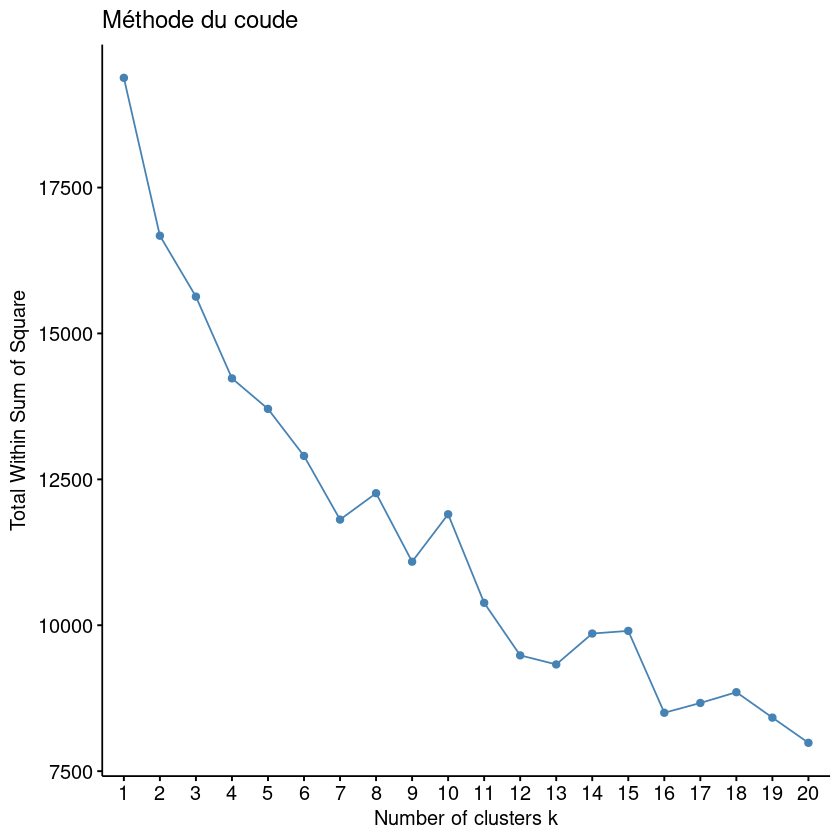

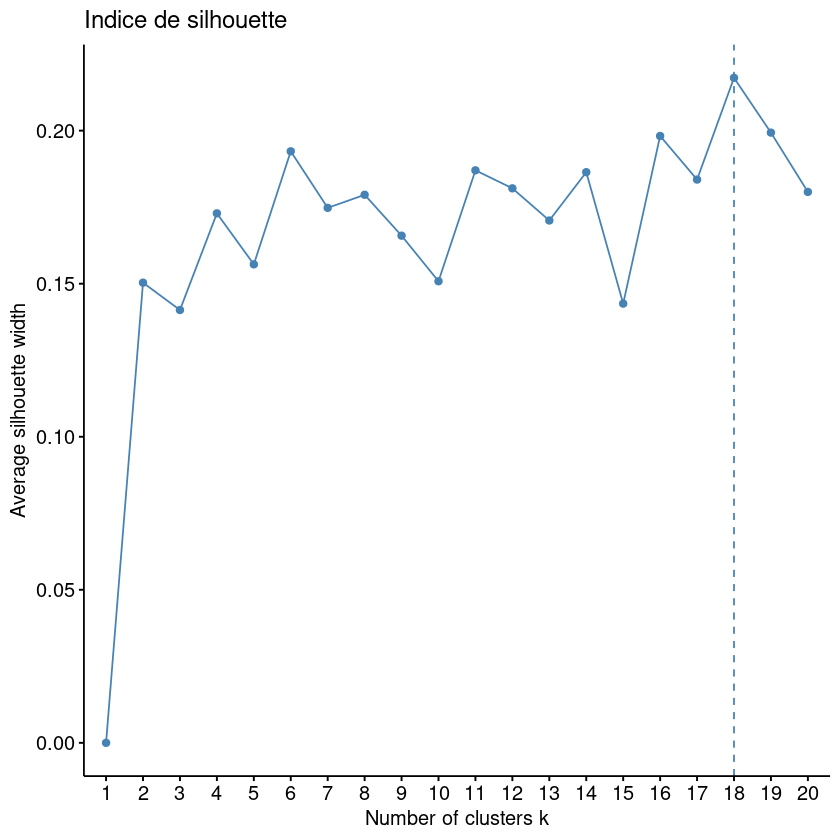

In [20]:
# Détermination du nombre optimal de clusters
# Méthode de l’élbow (coude) et l’indice de silhouette.

# Méthode du coude
fviz_nbclust(df_scaled, kmeans, method = "wss", k.max = 20) +
  ggtitle("Méthode du coude")

# Indice de silhouette
fviz_nbclust(df_scaled, kmeans, method = "silhouette", k.max = 20) +
  ggtitle("Indice de silhouette")

In [21]:
# Application de K-Means Clustering

# Choisissez un nombre de clusters approprié (par exemple, 3).
k <- 10

# K-Means Clustering
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(df_scaled, centers = k, nstart = 25)

In [22]:
kmeans_result

K-means clustering with 10 clusters of sizes 79, 122, 124, 37, 37, 147, 103, 88, 142, 142

Cluster means:
     ses_urban     ses_age ses_languageFrench ses_educBHS ses_educUniv
1  -0.02992939 -0.14097340          1.2516786  0.04233743  -0.17129760
2  -0.22850003  0.52819207          1.4563140 -0.09425089  -0.09457748
3   0.07199247 -0.02379921         -0.6186862 -0.23944624   0.23127680
4  -0.58809718  0.17113483         -0.6538753  0.21258990  -0.33651586
5  -0.08318968 -0.18433313         -0.2411172  0.14633401   0.15091230
6   0.36294552  0.04363241         -0.6241920 -0.09930857   0.18554438
7  -0.02763351 -0.07734763         -0.6538753  0.07879160  -0.13460387
8  -0.25595475  0.12302915          1.3542998  0.37521799  -0.27189470
9  -0.01642179 -0.14928700         -0.6077826  0.08801017   0.01322719
10  0.14437427 -0.26716946         -0.2851337 -0.10189227   0.08378604
   ses_incomeLow ses_incomeHigh ses_immigrant ses_regionAtlantic
1   -0.033367598    0.118194965   -0.14841023   

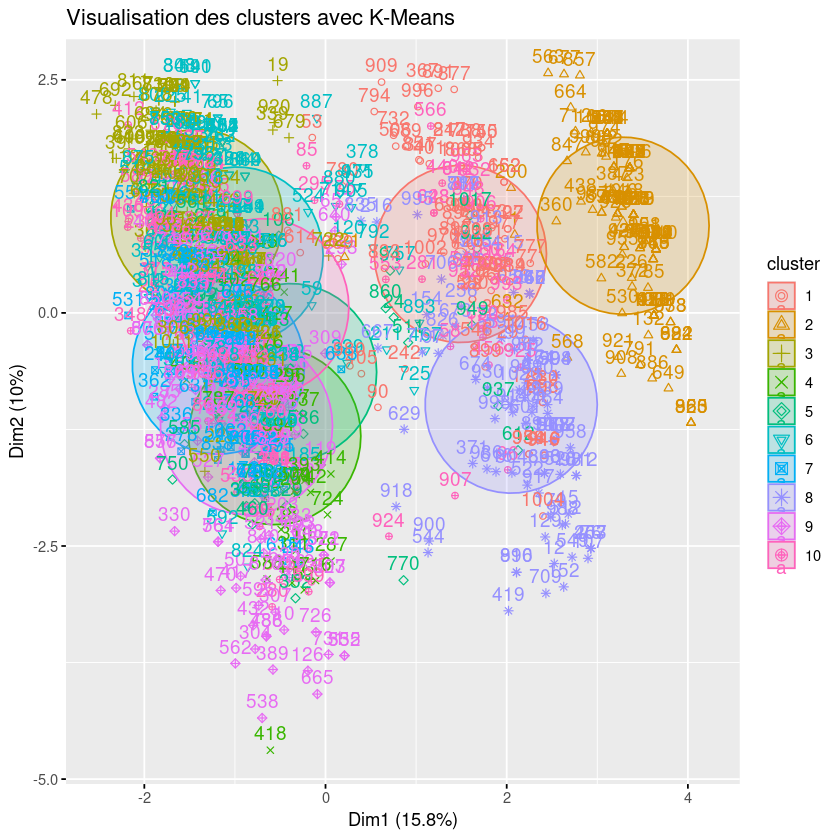

In [23]:
# Visualisation des clusters

# Visualisation des clusters dans l’espace des deux premières dimensions :

# Utilisation de factoextra pour représenter les clusters
fviz_cluster(kmeans_result, data = df_scaled, ellipse.type = "euclid") +
  ggtitle("Visualisation des clusters avec K-Means")

In [24]:
library(dplyr)
library(tidyr)

# Ajouter les clusters au dataframe original
df_pilot_2025$cluster <- as.factor(kmeans_result$cluster)

# Préparer les données pour pouvoir donner des noms aux clusters
df_pilot_2025 <- df_pilot_2025 %>%
  mutate(cluster_name = as.character(cluster))

# Créer des variables dummy
# Liste des clusters
clusters_uniques <- unique(df_pilot_2025$cluster)
# Création des variables
for (i in clusters_uniques) {
  df_pilot_2025[[paste0("cluster_", i)]] <- ifelse(df_pilot_2025$cluster == i, 1, 0)
}

In [25]:
# Sauvegarder les résultats du clustering
saveRDS(origines, file="../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_origins.rds")
saveRDS(ecarts_types, file="../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_scale_ecarts_types.rds")
saveRDS(kmeans_result, file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_kmeans.rds")
saveRDS(df_pilot_2025, file = "../../../_PrivateFolder_datagotchi_federal_2025/data/clustering/can2025/03_pilot_2025.rds")